#Step 1: Define problem
upload image and convert image into text document

#Step 2: Construct and prepare data

In [ ]:
import os
import shutil
import urllib.request

In [ ]:
urllib.request.urlretrieve('https://github.com/atomic14/ar-browser-sudoku/raw/master/tensorflow/fonts/google.zip', 'data.zip')
from zipfile import ZipFile  
with ZipFile("/content/data.zip", 'r') as zip: 
	zip.printdir() 
	zip.extractall() 

File Name                                             Modified             Size
google/                                        2017-11-15 09:11:46            0
google/Amatic_SC/                              2017-11-15 09:11:34            0
google/Amatic_SC/AmaticSC-Regular.ttf          2017-11-15 09:11:34       146356
google/Amatic_SC/AmaticSC-Bold.ttf             2017-11-15 09:11:34       139880
google/Amatic_SC/OFL.txt                       2017-11-15 09:11:34         4466
google/Tinos/                                  2020-07-25 19:02:56            0
google/Tinos/Tinos-Regular.ttf                 2017-11-15 09:11:38       475288
google/Tinos/Tinos-Bold.ttf                    2017-11-15 09:11:38       451516
google/Tinos/LICENSE.txt                       2017-11-15 09:11:38        11560
google/Paytone_One/                            2017-11-15 09:11:42            0
google/Paytone_One/PaytoneOne-Regular.ttf      2017-11-15 09:11:42       106936
google/Paytone_One/OFL.txt              

In [ ]:
urllib.request.urlretrieve('https://github.com/atomic14/ar-browser-sudoku/raw/master/tensorflow/fonts/vi.zip', 'data.zip')
from zipfile import ZipFile  
with ZipFile("/content/data.zip", 'r') as zip: 
	zip.printdir() 
	zip.extractall() 

In [ ]:
urllib.request.urlretrieve('https://github.com/atomic14/ar-browser-sudoku/raw/master/tensorflow/fonts/win.zip', 'data.zip')
from zipfile import ZipFile  
with ZipFile("/content/data.zip", 'r') as zip: 
	zip.printdir() 
	zip.extractall() 

In [ ]:
file_paths = []
for root, directories, files in os.walk("/content/"):
    for filename in files:
        # Join the two strings in order to form the full filepath.
        filepath = os.path.join(root, filename)
        #to append
        file_paths.append(filepath)

In [ ]:
os.mkdir("/content/dataset")
for i in file_paths:
  if(".ttf" in i or ".TTF" in i or ".otf" in i):
    shutil.copy(i, "/content/dataset/")

In [ ]:
!pip install fontTools

     |████████████████████████████████| 819kB 3.5MB/s 


In [ ]:
import os
import re
import sys
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from itertools import chain
from fontTools.ttLib import TTFont
from fontTools.unicode import Unicode


def load_font(path):
    ttf = TTFont(
        path, 0, verbose=0, allowVID=0, 
        ignoreDecompileErrors=True, fontNumber=-1)
    chars = chain.from_iterable(
        [y + (Unicode[y[0]], )
        for y in x.cmap.items()] for x in ttf['cmap'].tables)
    chars = set(chars)
    chars = sorted(chars, key=lambda c: int(c[0]))

    # Use this for just checking if the font contains the codepoint given as
    # second argument:
    # char = int(sys.argv[2], 0)
    # print(Unicode[char])
    # print(char in (x[0] for x in chars))

    ttf.close()
    return chars


def convert_ttf(path, fontsize=60, w=96, h=96):
    base = os.path.basename(path)
    dirs = os.path.splitext(base)[0]
    if not os.path.exists(dirs):
        os.mkdir(dirs)
    chars = load_font(path)
    font = ImageFont.truetype(path, fontsize)
    for c in chars:
        if re.match('.notdef|nonmarkingreturn|.null', c[1]):
            continue
        img = Image.new('RGB', (w, h), (255, 255, 255))
        draw = ImageDraw.Draw(img)
        (ws, hs) = font.getsize(chr(c[0]))
        wb = (w - ws) * 0.5
        hb = (h - hs) * 0.5
        draw.text((wb, hb), chr(c[0]), (0, 0, 0), font=font)
        draw = ImageDraw.Draw(img)
        img.save('{}/{:d}.png'.format(dirs, c[0]))

In [8]:
for i in os.listdir("/content/dataset/"):
  convert_ttf("/content/dataset/"+i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: 'verbose' is deprecated; configure logging instead
  app.launch_new_instance()


In [9]:
#creating empty class
os.mkdir("/content/dataset_by_class")
abcd = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
for i in abcd:
  os.mkdir("/content/dataset_by_class/"+i)

In [10]:
file_paths = []
for root, directories, files in os.walk("/content/"):
    for filename in files:
        # Join the two strings in order to form the full filepath.
        filepath = os.path.join(root, filename)
        #to append
        file_paths.append(filepath)

In [21]:
file_names_as_abcd = [i for i in range(97,123)]
for i in [j for j in range(65,91)]:
  file_names_as_abcd.append(i)

In [22]:
file_paths_ = []
for i in file_paths:
  if ".png" in i:
    file_paths_.append(i)

In [23]:
for i in file_paths_[:10]:
  print(i)

/content/Saira-Light/225.png
/content/Saira-Light/226.png
/content/Saira-Light/153.png
/content/Saira-Light/269.png
/content/Saira-Light/8706.png
/content/Saira-Light/43.png
/content/Saira-Light/218.png
/content/Saira-Light/8805.png
/content/Saira-Light/276.png
/content/Saira-Light/7902.png


In [ ]:
os.listdir("/content/dataset_by_class/Y")

In [26]:
count = 0
for i in file_paths_:
  try:
    num = int(i.split("/")[-1].replace(".png",""))
    if num in file_names_as_abcd:
      count += 1
      shutil.copy(i,"/content/dataset_by_class/" + abcd[file_names_as_abcd.index(num)]+ "/"+str(count) + ".png")
  except:
    pass

In [25]:
len(file_names_as_abcd), len(abcd)

(52, 52)

## Storing dataset in to drive

In [29]:
shutil.move("/content/dataset_by_class/", "/htr/dataset_by_class/")

'/htr/dataset_by_class/'

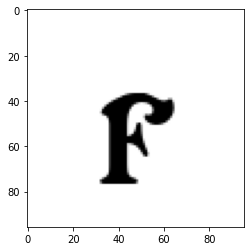

In [ ]:
from PIL import Image
try:
  image = Image.open('/content/dataset_by_class/F/70.png')
  plt.imshow(image)
except:
  pass

### train test split

In [39]:
#shutil.rmtree("/htr/training/")
#shutil.rmtree("/htr/testing//")

In [40]:
os.mkdir("/htr/training/")
os.mkdir("/htr/testing/")
for cls in os.listdir("/htr/dataset_by_class"):
  os.mkdir("/htr/training/"+cls)
  os.mkdir("/htr/testing/"+cls)

In [ ]:
for cls in os.listdir("/htr/dataset_by_class"):
  #print("Class: ", cls)
  count = 0
  train_file_size = int(len(os.listdir("/htr/dataset_by_class/"+cls))*.80)
  for file in os.listdir("/htr/dataset_by_class/"+cls):
    if count <= train_file_size :
      count += 1
      shutil.copy("/htr/dataset_by_class/"+cls+"/"+file,"/htr/training/"+cls+"/")
    else:
      shutil.copy("/htr/dataset_by_class/"+cls+"/"+file,"/htr/testing/"+cls+"/")

# Step 3: Build and train model

## importing library 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [81]:
#downloading for local files
!git clone "https://github.com/atomic14/ar-browser-sudoku.git"
shutil.copytree("/content/ar-browser-sudoku/tensorflow/lib/", "/content/lib")
from lib.plot_images import plot_images
from lib.confusion_matrix import create_confusion_matrix_callback

## Training hyperparameters

In [43]:
batch_size = 32
epochs = 10

## This must match what is used in the javascript code

In [44]:
IMG_HEIGHT = 20
IMG_WIDTH = 20

## Data Generators
We defined two data generators, one that augments the data to make our training more general and one that just scales and centers the data.

In [45]:
augmented_image_gen = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=0.1,
    shear_range=2,
    brightness_range=[0.9, 1.1],
    validation_split=0.2,
    samplewise_center=True,
    samplewise_std_normalization=True)

normal_image_gen = ImageDataGenerator(
    validation_split=0.2,
    samplewise_center=True,
    samplewise_std_normalization=True
)

## Load in the data
For the training data and validation data it's important that they have the same seed so we get the correct validation subset for the training subset.

In [46]:
train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory="/htr/training/",
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical",
                                                     seed=65657867,
                                                     subset='training')
val_data_gen = normal_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory="/htr/testing/",
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical",
                                                     seed=65657867,
                                                     subset='validation')
confusion_data_gen = normal_image_gen.flow_from_directory(batch_size=train_data_gen.samples,
                                                     directory="/htr/training/",
                                                     color_mode="grayscale",
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical",
                                                     seed=65657867,
                                                     subset='validation')

Found 23487 images belonging to 52 classes.
Found 1442 images belonging to 52 classes.
Found 5840 images belonging to 52 classes.


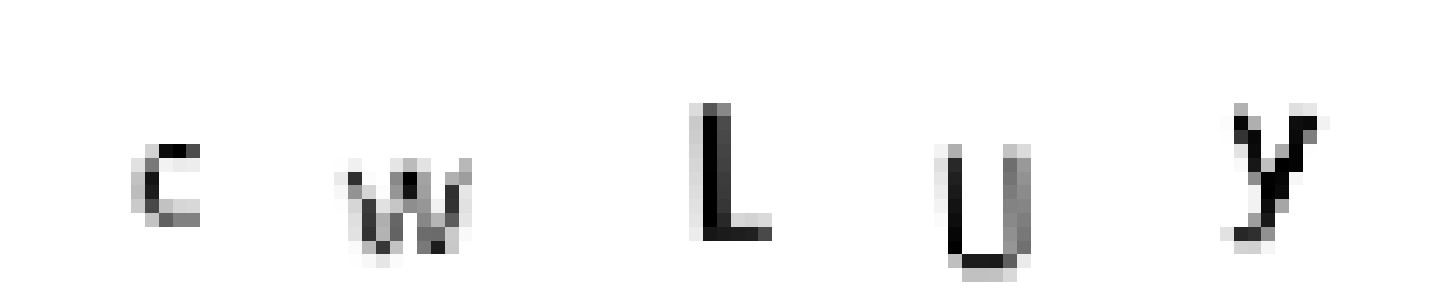

In [82]:
sample_training_images, _ = next(train_data_gen)
plot_images(sample_training_images[:5], IMG_WIDTH, IMG_HEIGHT)

## Our very simple model
A single convolution layer, followed by a dense layer followed by the output layer.
We're using linear regularisation and dropouts to prevent overfitting of the training data.

In [83]:
model = Sequential([
    Conv2D(16, 3, 
           padding='same',
           activation='relu',
           kernel_regularizer=regularizers.l2(0.0001),
           input_shape=(IMG_HEIGHT, IMG_WIDTH , 1)),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.2),
    Dense(52, activation='softmax')
])

## Do the actual training

In [86]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size,
    callbacks=[tensorboard_callback, cm_callback]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
  1/733 [..............................] - ETA: 0s - loss: 4.0171 - accuracy: 0.0625WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
733/733 [==============================] - 32s 44ms/step - loss: 3.0908 - accuracy: 0.1990 - val_loss: 1.6066 - val_accuracy: 0.6257
Epoch 2/10
733/733 [==============================] - 32s 43ms/step - loss: 2.0508 - accuracy: 0.4282 - val_loss: 1.1572 - val_accuracy: 0.7292
Epoch 3/10
733/733 [==============================] - 32s 43ms/step - loss: 1.7375 - accuracy: 0.5103 - val_loss: 0.9736 - val_accuracy: 0.7903
Epoch 4/10
733/733 [==============================] - 31s 43ms/step - loss: 1.6231 - accuracy: 0.5403 - val_loss: 0.9340 - val_acc

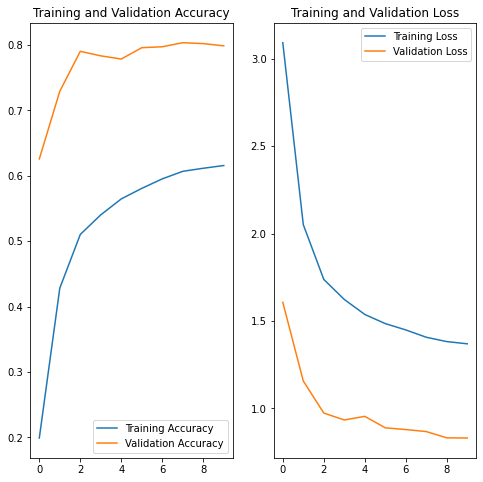

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [88]:
model.save("/htr/trained.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/htr/trained.model/assets


## Train on all the available data for our final model

In [89]:
all_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory="/htr/dataset_by_class/",
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")

Found 36640 images belonging to 52 classes.


In [90]:
all_history = model.fit_generator(
    all_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=50)

Epoch 1/50
733/733 [==============================] - 27s 37ms/step - loss: 1.3634 - accuracy: 0.6246
Epoch 2/50
733/733 [==============================] - 25s 34ms/step - loss: 1.3565 - accuracy: 0.6209
Epoch 3/50
733/733 [==============================] - 25s 35ms/step - loss: 1.3280 - accuracy: 0.6337
Epoch 4/50
733/733 [==============================] - 25s 35ms/step - loss: 1.3187 - accuracy: 0.6322
Epoch 5/50
733/733 [==============================] - 25s 35ms/step - loss: 1.3172 - accuracy: 0.6386
Epoch 6/50
733/733 [==============================] - 25s 35ms/step - loss: 1.3115 - accuracy: 0.6376
Epoch 7/50
733/733 [==============================] - 25s 34ms/step - loss: 1.2914 - accuracy: 0.6427
Epoch 8/50
733/733 [==============================] - 25s 34ms/step - loss: 1.2912 - accuracy: 0.6438
Epoch 9/50
733/733 [==============================] - 25s 35ms/step - loss: 1.2813 - accuracy: 0.6477
Epoch 10/50
733/733 [==============================] - 25s 34ms/step - loss: 1.269

# Step 4: Evaluate model

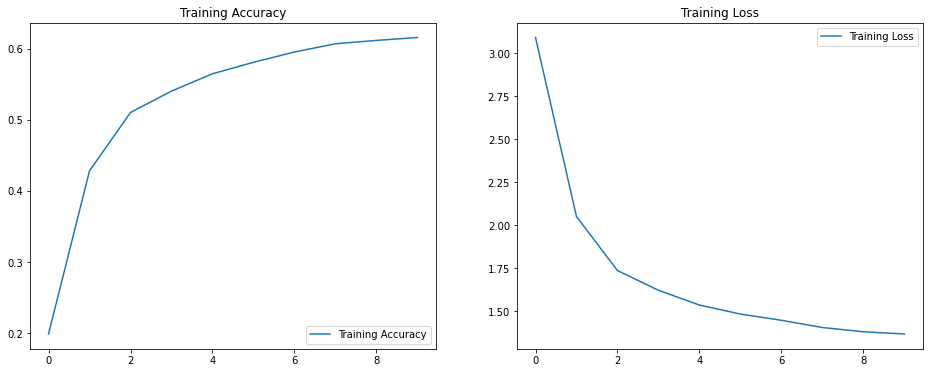

In [91]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [93]:
model.save("/htr/trained.model")

INFO:tensorflow:Assets written to: /htr/trained.model/assets


# Step 5: Deploy and monitor

In [95]:
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "/htr/tfjs_model")

     |████████████████████████████████| 71kB 2.4MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [101]:
model.save("/htr/trained_model.h5")

# transfering data to drive

In [ ]:
#os.mkdir("/content/drive/My Drive/htr/")
shutil.copytree("/htr/tfjs_model", "/content/drive/My Drive/htr/tfjs_model")
shutil.copytree("/htr/trained.model/", "/content/drive/My Drive/htr/trained.model/")
shutil.copy("/htr/trained_model.h5", "/content/drive/My Drive/htr/")

# Testing the Model

In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from itertools import compress
print(tf.version.VERSION)

2.3.0


In [105]:
model =  keras.models.load_model("/htr/trained.model")

In [106]:
IMG_HEIGHT = 20
IMG_WIDTH = 20

In [107]:
normal_image_gen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)
test_data_gen = normal_image_gen.flow_from_directory(batch_size=5193,
                                                     directory="/htr/dataset_by_class/",
                                                     color_mode="grayscale",
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")

Found 36640 images belonging to 52 classes.


In [108]:
test_images, test_labels = next(test_data_gen)
filenames = test_data_gen.filenames
test_pred = model.predict(test_images)

In [109]:
true_labels = tf.argmax(test_labels,1)

In [110]:
predicted_labels = tf.argmax(test_pred,1)

In [111]:
wrong = (true_labels != predicted_labels)

In [112]:
wrong_images = test_images[wrong]
wrong_true_labels = true_labels[wrong]
wrong_prediced_labels = predicted_labels[wrong]
print(f"Got {wrong_images.shape[0]} wrong")
wrong_filenames = list(compress(filenames, wrong))
print(wrong_filenames)

Got 838 wrong
['A/10121.png', 'A/10319.png', 'A/10988.png', 'A/11203.png', 'A/13538.png', 'A/13589.png', 'A/13803.png', 'A/13855.png', 'A/14813.png', 'A/15103.png', 'A/16190.png', 'A/16292.png', 'A/16507.png', 'A/16611.png', 'A/17465.png', 'A/17807.png', 'A/17873.png', 'A/18077.png', 'A/18223.png', 'A/18431.png', 'A/2318.png', 'A/2363.png', 'A/2828.png', 'A/2883.png', 'A/3491.png', 'A/3559.png', 'A/3848.png', 'A/3923.png', 'A/431.png', 'A/439.png', 'A/686.png', 'A/699.png', 'A/7571.png', 'A/7719.png', 'A/8234.png', 'A/8336.png', 'A/8395.png', 'A/8499.png', 'A/9254.png', 'A/9305.png', 'A/9435.png', 'A/9487.png', 'B/10102.png', 'B/10112.png', 'B/10310.png', 'B/10316.png', 'B/10518.png', 'B/10928.png', 'B/10979.png', 'B/11132.png', 'B/11142.png', 'B/11194.png', 'B/11350.png', 'B/11489.png', 'B/11540.png', 'B/11591.png', 'B/11714.png', 'B/11766.png', 'B/11818.png', 'B/12101.png', 'B/12338.png', 'B/12356.png', 'B/1238.png', 'B/12509.png', 'B/12598.png', 'B/1262.png', 'B/12662.png', 'B/12713

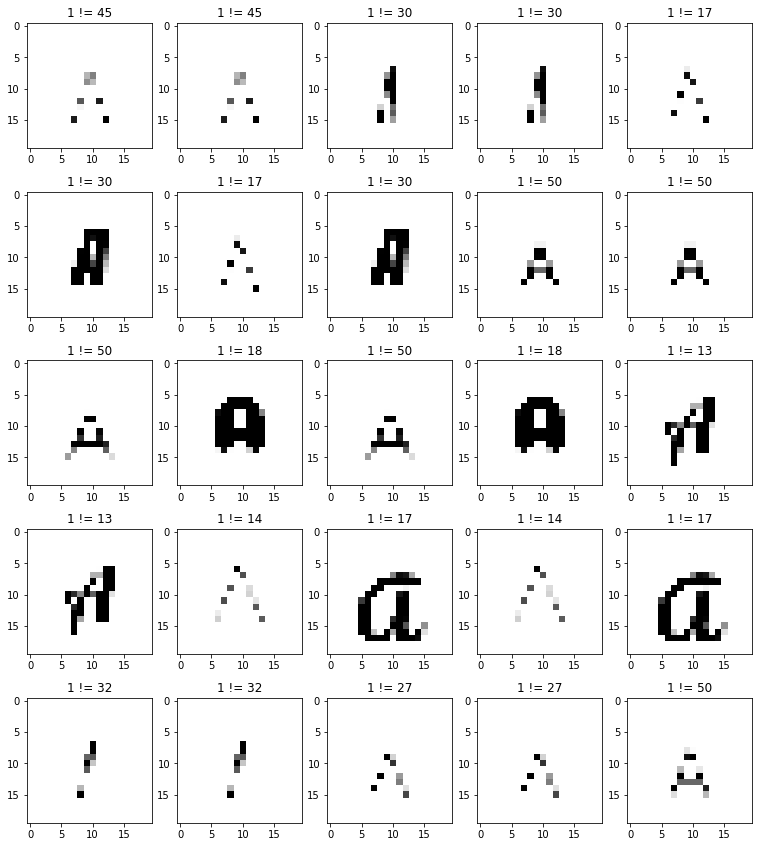

In [113]:
def plot_images(images, true_labels, pred_labels):
    fig = plt.figure(figsize=(13, 15))
    columns = 5
    rows = 5

    # ax enables access to manipulate each of subplots
    ax = []

    for i in range(min(images.shape[0], columns*rows)):
        img = images[i]
        # create subplot and append to ax
        ax.append( fig.add_subplot(rows, columns, i+1) )
        ax[-1].set_title(f"{true_labels[i]+1} != {pred_labels[i]+1}")
        plt.imshow(img.reshape(IMG_WIDTH, IMG_HEIGHT), cmap="gray")
    
    plt.show()

plot_images(wrong_images, wrong_true_labels, wrong_prediced_labels)